In [ ]:
#pip install xgboost

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
#regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df_encoded = pd.read_csv('df_encoded_2.csv')
#df_encoded.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_encoded.columns.values]
df_encoded


,Unnamed: 0,Building Dimension,Insured_Period_Equal to 1,Residential,Painted,Fenced,Garden,Rural,Building_Type,Building age,NumberOfWindows_<5,NumberOfWindows_>=5 & <10,NumberOfWindows_>=10,Claim
0,0,290.000000,1,0,1,0,1,0,1,53.0,0,0,0,0
1,1,490.000000,1,0,0,1,0,1,1,165.0,1,0,0,0
2,2,595.000000,1,0,1,0,1,0,1,54.0,0,0,0,0
3,3,2840.000000,1,0,0,0,1,0,1,53.0,0,0,0,0
4,4,680.000000,1,0,0,1,0,1,1,214.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,7155,2178.411863,1,1,0,0,1,0,1,11.0,0,0,0,0
7156,7156,2178.411863,1,0,0,0,1,0,2,33.0,0,0,0,1
7157,7157,2178.411863,0,0,0,0,1,0,1,24.0,0,0,0,0
7158,7158,2178.411863,1,0,0,0,1,0,1,41.0,0,0,0,0


## Buiding a Base Model

**Dividing the dataset into Features and Target**

In [3]:
target = 'Claim'
X = df_encoded.drop([target], axis=1)
y = df_encoded[target]
X

,Unnamed: 0,Building Dimension,Insured_Period_Equal to 1,Residential,Painted,Fenced,Garden,Rural,Building_Type,Building age,NumberOfWindows_<5,NumberOfWindows_>=5 & <10,NumberOfWindows_>=10
0,0,290.000000,1,0,1,0,1,0,1,53.0,0,0,0
1,1,490.000000,1,0,0,1,0,1,1,165.0,1,0,0
2,2,595.000000,1,0,1,0,1,0,1,54.0,0,0,0
3,3,2840.000000,1,0,0,0,1,0,1,53.0,0,0,0
4,4,680.000000,1,0,0,1,0,1,1,214.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,7155,2178.411863,1,1,0,0,1,0,1,11.0,0,0,0
7156,7156,2178.411863,1,0,0,0,1,0,2,33.0,0,0,0
7157,7157,2178.411863,0,0,0,0,1,0,1,24.0,0,0,0
7158,7158,2178.411863,1,0,0,0,1,0,1,41.0,0,0,0


In [4]:
#remove Unnamed
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]
X

,Building Dimension,Insured_Period_Equal to 1,Residential,Painted,Fenced,Garden,Rural,Building_Type,Building age,NumberOfWindows_<5,NumberOfWindows_>=5 & <10,NumberOfWindows_>=10
0,290.000000,1,0,1,0,1,0,1,53.0,0,0,0
1,490.000000,1,0,0,1,0,1,1,165.0,1,0,0
2,595.000000,1,0,1,0,1,0,1,54.0,0,0,0
3,2840.000000,1,0,0,0,1,0,1,53.0,0,0,0
4,680.000000,1,0,0,1,0,1,1,214.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7155,2178.411863,1,1,0,0,1,0,1,11.0,0,0,0
7156,2178.411863,1,0,0,0,1,0,2,33.0,0,0,0
7157,2178.411863,0,0,0,0,1,0,1,24.0,0,0,0
7158,2178.411863,1,0,0,0,1,0,1,41.0,0,0,0


**Separating dataset into train and test**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5728, 12)
X_test shape: (1432, 12)
y_train shape: (5728,)
y_test shape: (1432,)


**Using Random Forest Classifier**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# create a random forest classifier object
rfc = RandomForestClassifier()

# train the classifier on the training data
rfc.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)
# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
print("Accuracy:", accuracy)
print("AUC-ROC:", roc_auc)

Accuracy: 0.7583798882681564
AUC-ROC: 0.6564316721747762


In [7]:
y_pred_proba

array([[0.98, 0.02],
       [0.73, 0.27],
       [0.31, 0.69],
       ...,
       [0.96, 0.04],
       [0.92, 0.08],
       [0.98, 0.02]])

Accuracy, proportion of correct predictions made by the model over all predictions.
AUC ability of the model to distinguish between two classes

AUC-ROC score of 0.5: This indicates a random guess model, where the model is not able to distinguish between positive and negative classes.

AUC-ROC score between 0.5 and 0.7: This indicates a poor model performance, where the model is not able to distinguish between the two classes very well.

AUC-ROC score between 0.7 and 0.8: This indicates a fair model performance, where the model is able to distinguish between the two classes with some degree of accuracy.

AUC-ROC score between 0.8 and 0.9: This indicates a good model performance, where the model is able to distinguish between the two classes with a high degree of accuracy.

AUC-ROC score between 0.9 and 1.0: This indicates an excellent model performance, where the model is able to distinguish between the two classes with almost perfect accuracy.

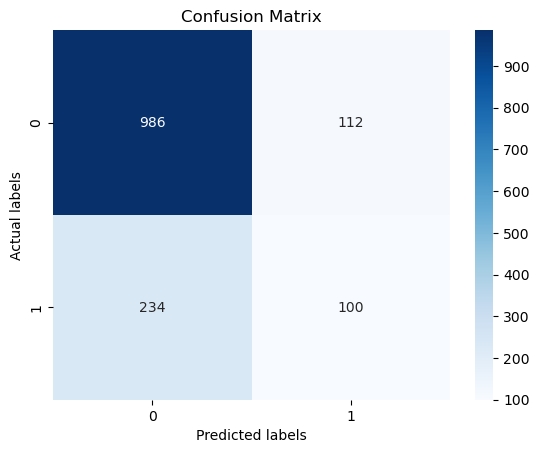

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# create heatmap of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

**Test Dataset**

In [9]:
# load test dataset
test = pd.read_csv('test_data.csv')
encoded_test = pd.read_csv('test_data_encoded_2.csv')
encoded_test

,Unnamed: 0,Building Dimension,Insured_Period_Equal to 1,Residential,Painted,Fenced,Garden,Rural,Building_Type,Building age,NumberOfWindows_<5,NumberOfWindows_>=5 & <10,NumberOfWindows_>=10
0,0,300.000000,1,0,0,1,0,1,1,53.0,1,0,0
1,1,300.000000,0,0,0,1,0,1,1,56.0,1,0,0
2,2,790.000000,0,0,0,0,1,0,1,53.0,0,0,0
3,3,1405.000000,1,0,0,1,0,1,1,10.0,1,0,0
4,4,1405.000000,1,0,0,1,0,1,1,12.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,3064,1936.171291,1,0,0,0,1,0,4,115.0,0,0,0
3065,3065,1936.171291,1,0,0,0,1,0,2,64.0,0,0,0
3066,3066,1936.171291,1,0,0,0,1,0,2,19.0,0,0,0
3067,3067,1936.171291,1,0,0,0,1,0,1,213.0,0,0,0


In [10]:
#remove Unnamed
encoded_test = encoded_test.loc[:, ~encoded_test.columns.str.contains('^Unnamed')]
encoded_test

,Building Dimension,Insured_Period_Equal to 1,Residential,Painted,Fenced,Garden,Rural,Building_Type,Building age,NumberOfWindows_<5,NumberOfWindows_>=5 & <10,NumberOfWindows_>=10
0,300.000000,1,0,0,1,0,1,1,53.0,1,0,0
1,300.000000,0,0,0,1,0,1,1,56.0,1,0,0
2,790.000000,0,0,0,0,1,0,1,53.0,0,0,0
3,1405.000000,1,0,0,1,0,1,1,10.0,1,0,0
4,1405.000000,1,0,0,1,0,1,1,12.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,1936.171291,1,0,0,0,1,0,4,115.0,0,0,0
3065,1936.171291,1,0,0,0,1,0,2,64.0,0,0,0
3066,1936.171291,1,0,0,0,1,0,2,19.0,0,0,0
3067,1936.171291,1,0,0,0,1,0,1,213.0,0,0,0


In [11]:
new_preds = rfc.predict(encoded_test)

**Submission**

In [12]:
submission = pd.DataFrame({"Customer Id": test["Customer Id"],"Claim": new_preds})
submission.to_csv('first_submission_rf_ba.csv', index = False)

AUC from test data 0.559148003

## Balance dataset

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X,y)

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))

Original dataset shape: Counter({0: 5526, 1: 1634})
Resampled dataset shape: Counter({0: 5526, 1: 5526})


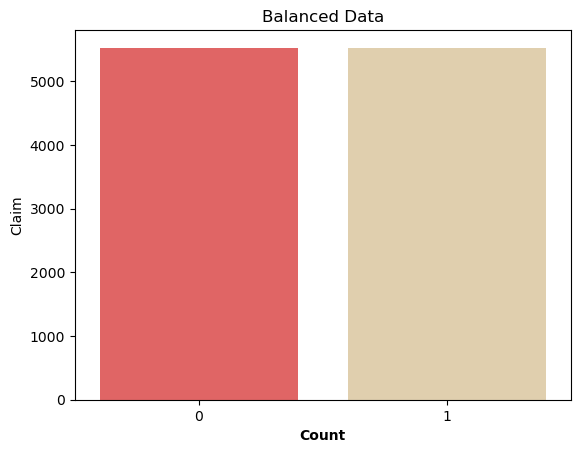

In [14]:
sns.countplot(x=y_resampled, palette=['#F55050','#E8D2A6'])
plt.title('Balanced Data')
plt.xlabel('Count',fontdict={'fontweight':'bold'})
plt.ylabel('Claim')
plt.show()

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

**Using Random Forest

In [15]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

print("X_train shape:", X_res_train.shape)
print("X_test shape:", X_res_test.shape)
print("y_train shape:", y_res_train.shape)
print("y_test shape:", y_res_test.shape)

X_train shape: (8841, 12)
X_test shape: (2211, 12)
y_train shape: (8841,)
y_test shape: (2211,)


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# 1) Define preprocessing steps

numeric_feature = ['Building Dimension','Building age']
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_feature)])

# 2) define a model
rdf_up = RandomForestClassifier()

# 3) Create and evaluate the pipeline
# Bundle preprocessing and modeling code in a pipeline

pipe = Pipeline(steps=[('preprocessor', preprocessor),('model', rdf_up)])

# Preprocessing of training data, fit model
pipe.fit(X_res_train, y_res_train)

# Preprocessing of validation data, get predictions
y_pred = pipe.predict(X_res_test)
y_pred_proba = pipe.predict_proba(X_res_test)
# calculate the accuracy of the classifier
accuracy = accuracy_score(y_res_test, y_pred)
roc_auc = roc_auc_score(y_res_test, y_pred_proba[:,1])
print("Accuracy:", accuracy)
print("AUC-ROC:", roc_auc)

Accuracy: 0.7661691542288557
AUC-ROC: 0.8343160599291389


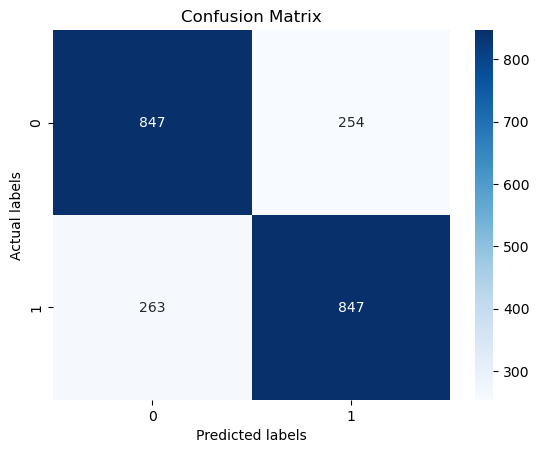

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_res_test, y_pred)
# create heatmap of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [18]:
new_preds = pipe.predict(encoded_test)
submission = pd.DataFrame({"Customer Id": test["Customer Id"],"Claim": new_preds})
submission.to_csv('submission_rf_ba_up.csv', index = False)

**Using XGBClassifier and Upsample Data**

In [ ]:
from xgboost import XGBClassifier
numeric_feature = ['Building Dimension','Building age']
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_feature)])

# 2) define a model
XGB_up = XGBClassifier()

# 3) Create and evaluate the pipeline
# Bundle preprocessing and modeling code in a pipeline

pipe1 = Pipeline(steps=[('preprocessor', preprocessor),('model', XGB_up)])

# Preprocessing of training data, fit model
pipe1.fit(X_res_train, y_res_train)

# Preprocessing of validation data, get predictions
y_pred = pipe1.predict(X_res_test)
y_pred_proba = pipe1.predict_proba(X_res_test)
# calculate the accuracy of the classifier
accuracy = accuracy_score(y_res_test, y_pred)
roc_auc = roc_auc_score(y_res_test, y_pred_proba[:,1])
print("Accuracy:", accuracy)
print("AUC-ROC:", roc_auc)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_res_test, y_pred)
# create heatmap of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
new_preds = pipe1.predict(encoded_test)
submission = pd.DataFrame({"Customer Id": test["Customer Id"],"Claim": new_preds})
submission.to_csv('submission_xgb_ba_up.csv', index = False)

## Selecting Best Model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

In [ ]:
numeric_feature = ['Building Dimension']
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_feature)])

In [ ]:
pipes = []
pipes.append(('LogReg', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())])))
pipes.append(('QDA', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", QuadraticDiscriminantAnalysis())])))
pipes.append(('SVC', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", SVC())])))
pipes.append(('DTC', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())])))
pipes.append(('RF', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])))
pipes.append(('ExtraTrees', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", ExtraTreesClassifier())])))
pipes.append(('AdaBoost', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", AdaBoostClassifier())])))
pipes.append(('GBC', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", GradientBoostingClassifier())])))
pipes.append(('XGBClassifier', Pipeline(steps=[("preprocessor", preprocessor), ("classifier", XGBClassifier())])))

In [ ]:
def cross_val(pipeline, folds, scoring):
    """Function for cross validation using piepelines
    Args:
        pipes - list: list of pipelines to be evaluated
    Returns:
        fig - dataframe: dataframe showing output results
    """
    results = []
    names = []
    data_list = []

    for name, p in pipeline:
        cv_results = cross_val_score(p, X_resampled, y_resampled, cv=folds, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        data_list.append([name, round(cv_results.mean(), 2), round(cv_results.std(),2)])

    # create a dataframe for the results
    table = pd.DataFrame(np.array(data_list), columns=['model_name', 'metric_name', 'std'])
    table = table.sort_values(by='metric_name')
    #fig = ff.create_table(table)
    #fig.layout.width=500

    return table

In [ ]:
fig_linear = cross_val(pipes, 10, 'accuracy')
fig_linear

In [ ]:
model = XGBClassifier()
XGB_pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
XGB_pipe.fit(X_resampled, y_resampled)

In [ ]:
predictions = XGB_pipe.predict(encoded_test)

In [ ]:
submission = pd.DataFrame({"Customer Id": test["Customer Id"],"Claim": new_preds})
submission.to_csv('second_submission_XGB_Upsample.csv', index = False)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score

**Using Selected Model: XGBClassifier**

In [ ]:
X_train

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
# Standardize the column on both the training and testing data
X_train[['Building Dimension','Building age']] = scaler.fit_transform(X_train[['Building Dimension','Building age']])
X_test[['Building Dimension','Building age']] = scaler.transform(X_test[['Building Dimension','Building age']])

In [23]:
encoded_test[['Building Dimension','Building age']] = scaler.transform(encoded_test[['Building Dimension','Building age']])
encoded_test

C:\Users\AdelineDianeAyawaviM\AppData\Local\Temp\ipykernel_4732\2231486478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_test[['Building Dimension','Building age']] = scaler.transform(encoded_test[['Building Dimension','Building age']])


,Building Dimension,Insured_Period_Equal to 1,Residential,Painted,Fenced,Garden,Rural,Building_Type,Building age,NumberOfWindows_<5,NumberOfWindows_>=5 & <10,NumberOfWindows_>=10
0,-0.465116,1,0,0,1,0,1,1,0.478261,1,0,0
1,-0.465116,0,0,0,1,0,1,1,0.608696,1,0,0
2,-0.180233,0,0,0,0,1,0,1,0.478261,0,0,0
3,0.177326,1,0,0,1,0,1,1,-1.391304,1,0,0
4,0.177326,1,0,0,1,0,1,1,-1.304348,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,0.486146,1,0,0,0,1,0,4,3.173913,0,0,0
3065,0.486146,1,0,0,0,1,0,2,0.956522,0,0,0
3066,0.486146,1,0,0,0,1,0,2,-1.000000,0,0,0
3067,0.486146,1,0,0,0,1,0,1,7.434783,0,0,0


Confusion matrix:
 [[984 114]
 [239  95]]
AUC score: 0.6547874196961267


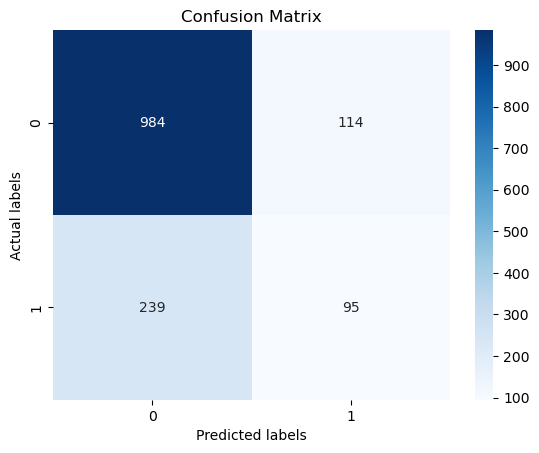

Optimal threshold: 0.17
Adjusted confusion matrix:
 [[762 336]
 [158 176]]
Adjusted AUC score: 0.6547874196961267


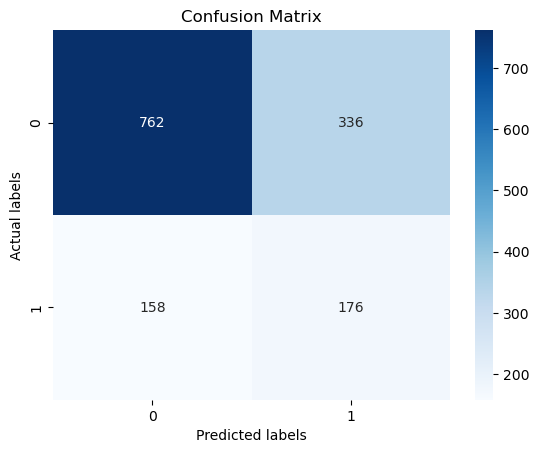

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
# 2) define a model
final = RandomForestClassifier()

# train the classifier on the training data
final.fit(X_train, y_train)

# Calculate probabilities and predictions on the test set
y_pred_proba = final.predict_proba(X_test)[:,1]
y_pred = final.predict(X_test)

# Calculate the confusion matrix and the AUC score for the default threshold of 0.5
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
print('Confusion matrix:\n', cm)
print('AUC score:', auc)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

# Calculate the ROC curve and find the optimal threshold using the F1 score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
optimal_threshold = thresholds[np.argmax(f1_scores)]
print('Optimal threshold:', optimal_threshold)

# Adjust the classification threshold to the optimal value and calculate the new confusion matrix and AUC score
y_pred_adjusted = (y_pred_proba >= 0.25).astype(int)
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
auc_adjusted = roc_auc_score(y_test, y_pred_proba)
print('Adjusted confusion matrix:\n', cm_adjusted)
print('Adjusted AUC score:', auc_adjusted)

ax = plt.subplot()
sns.heatmap(cm_adjusted, annot=True, ax=ax, cmap='Blues', fmt='g')

# set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()


In [ ]:
#encoded_test = encoded_test.loc[:, ~encoded_test.columns.str.contains('^Unnamed')]
encoded_test.columns

In [ ]:
X_train

In [ ]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
encoded_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in encoded_test.columns.values]


In [27]:
encoded_test[['Building Dimension','Building age']]

,Building Dimension,Building age
0,-0.465116,0.478261
1,-0.465116,0.608696
2,-0.180233,0.478261
3,0.177326,-1.391304
4,0.177326,-1.304348
...,...,...
3064,0.486146,3.173913
3065,0.486146,0.956522
3066,0.486146,-1.000000
3067,0.486146,7.434783


In [ ]:
encoded_test = scaler.transform(encoded_test)

In [28]:
optimal_threshold

0.19

In [33]:
new_preds_proba = final.predict_proba(encoded_test)[:,1]
new_preds = np.where(new_preds_proba>= 0.25,1,0)

In [34]:
submission = pd.DataFrame({"Customer Id": test["Customer Id"],"Claim": new_preds})
submission.to_csv('final_submission_rdf02.csv', index = False)